# Predicting Price of Diamonds
## Phase 2: Statistical Modelling

#### Group Name: Group 26

#### Name(s) & ID(s) of Group Members:
* Lai Pak Yin (s3827212)
* Weixi Guan (s3830776)
#### 

## Table of Contents
* [Introduction](#intro)
    + [Phase 1 Summary](#p1sum)
    + [Report Overview](#overview)
    + [Overview of Methodology](#method)
* [Statistical Modelling](#sm)
    + [Full Model Overview](#overview2)
    + [Model Fitting](#fit)
* [Neural Network Model Fitting & Tuning](#Review)
* [Critique & Limitations](#cl)
* [Summary & Conclusions](#sc)
    + [Project Summary](#sum)
    + [Summary of Findings](#find)
    + [Conclusions](#con)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='p1sum'></a>

In Phase 1, we completed the data cleaning & preprocessing and data visualisation tasks. We have dropped the variables that contain similar information in the csv file. For example, `inflight_wifi_service`, `inflight_entertainment`, `ease_of_online_booking` and `online_boarding` are dropped because they can be explained by other variable. 

For data visualisation tasks, we created some graph to explain variables in the dataset. By using the explanatory variables, we can concluded that the overall ratio of passenger felt neutral or dissatisfied are higher than satisfied. When comparing short and long distance flight, people keen on choose business class if they have a long flight distance and their satisfied ratio are highest compared with Eco class and Eco plus class. Therefore, passengers tend to feel neutral or not satisfied when they are travelling without business class in any distance. 

### Report Overview <a id='overview'></a>

For our Phase 2 assignment, we are going to perform statistical modelling with our csv file. We will start by introducing the methodology that we are going to use and an overview about our model. Then, we will start analysis our csv file by model fitting our data. We will also present 5 different fine-tuning plots for our Neural Network Model Fitting & Tuning and concluded a summary of our project to summarise our findings and the strengths and weaknesses of this project.

### Overview of Methodology <a id='method'></a>

For our Phase 2 Methodology, we start by cleaning the data inside the csv file, which is, we drop the rows if missing values existed and rename variables. Then, we establish our full model by perform one-hot-encoding and present the independent features that will affect our response variable. After that, we fit it into OLS (ordinary least squares) model 
and present different graphs with multiple linear regression to analysis the relationship between our response variable and independent features.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview <a id='overview2'></a> <a id='overview2'></a>

First of all, we import everything we need for the phase 2 project. However, since we use a new dataset to accomplish phase 2 project, we have to make sure the unique values of all categorical features that have no whitespace in it before we do the `Model Fitting` and `Feature Selection`. Eventually, we will do the `Reduced Model Diagnostic Checks`.

#### Module Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

csc = pd.read_csv('Phase2_Group26.csv')

Before starting to do the model fitting section, we have to modify the name of values of all the categorical features. We need to make sure that there should not be `whitespace` in the name. Instead, the `whitespace` will be replaced to `_` underline.

At first, we will present the unique values of all categorical features

In [5]:
categoricalColumns = csc.columns[csc.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(csc[col].unique())
    print('')

Unique values for cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique values for color
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



From above, we know that only `Very Good` has whitespace and we will replace it to `Very_Good`. Then the unique values of all categorical features will be presented again.

In [6]:
# Replace 'whitespace' to 'underline' for `cut` column
csc['cut'] = csc['cut'].replace({'Very Good': 'Very_Good'})

categoricalColumns = csc.columns[csc.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(csc[col].unique())
    print('')

Unique values for cut
['Ideal' 'Premium' 'Good' 'Very_Good' 'Fair']

Unique values for color
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



### Model Fitting <a id='fit'></a>

#### Full Model

We start to fit a multiple linear regression that predicts `price` using all of the available features and we name this the full model.

First, we show the data frame with the top 10 rows.

In [7]:
csc.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very_Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336
6,0.24,Very_Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336
7,0.26,Very_Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337
8,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,337
9,0.23,Very_Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338


We can manually add all the independent features when we are constructing the regression formula. However, if there are too many independent variables, we can use string function as below.

In [8]:
formula_string_indep_vars = ' + '.join(csc.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + depth + table + x + y + z


As the formula string presenting above, it works fine with the `Statsmodels` module. But we need to do "one-hot-encoding" for categorical features since we cannot do automatic variable selection with that formula.

As the code showing below, we use the `get_dummies()` function in `Pandas` for one-hot-encoding of categorical features and we can construct a new formula string with the encoded features.

In [9]:
# one-hot-encoding of categorical features
csc_encoded = pd.get_dummies(csc, drop_first=True)
csc_encoded.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [10]:
formula_string_indep_vars_encoded = ' + '.join(csc_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Next, for fun, we will add two interaction terms to our full model. We choose to add the interaction of the `carat` feature with `depth` and `cut_Good` respectively.

In [11]:
formula_string_encoded = formula_string_encoded + ' + depth:carat + cut_Good:carat'

And we add the square of the `depth` feature to illustrate how we can add higher order terms to our linear regression.

In [12]:
formula_string_encoded = formula_string_encoded + ' + np.power(depth, 2)'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + depth:carat + cut_Good:carat + np.power(depth, 2)


Now, we have defined our statistical model formula as a Python string and fit an OLS (ordinary least squares) model to our encoded data.

In [13]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=csc_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.438e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:53:06   Log-Likelihood:            -4.5511e+05
No. Observations:               53940   AIC:                         9.103e+05
Df Residuals:                   53913   BIC:                         9.105e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.856e+04   3940

The full model has an adjusted R-squared value of 0.922, which means that approximately 92% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant, though there are a few insignificant variables at a 5% level. 

Next, we need to define a new data frame for actual `price` vs. predicted `price` and the residuals for the full model. Later, we will use this data frame when plotting predicted values and the regression.

In [14]:
residuals_full = pd.DataFrame({'actual': csc_encoded['price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1363.886110,1689.886110
1,326,-931.928336,1257.928336
2,327,-236.292392,563.292392
3,334,-760.586054,1094.586054
4,335,-3047.637196,3382.637196
5,336,-1233.191002,1569.191002
6,336,-315.538708,651.538708
7,337,-1060.245390,1397.245390
8,337,-400.990515,737.990515
9,338,-738.982433,1076.982433


Then, we plot actual `price` values vs. predicted `price` values.

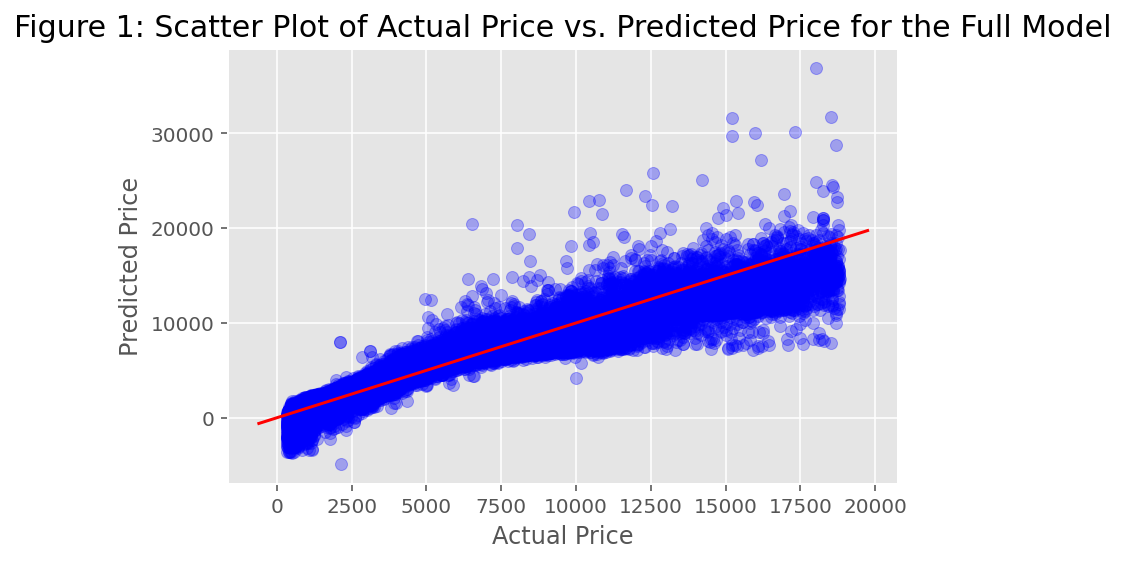

In [15]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3, color='blue')
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Figure 1: Scatter Plot of Actual Price vs. Predicted Price for the Full Model', fontsize=15)
plt.show()

As we can see from the figure 1, the model produces a prediction over 30000 even though the highest price in this figure is approximate 20000.

Furthermore, we will check the diagnostics for the full model.

### Full Model Diagnostic Checks

In this section, we would like to check whether there are indications of violations of the regression assumptions, which are:
1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals

Firstly, we need to get a scatter plot of residuals (as a function of predicted `price`).

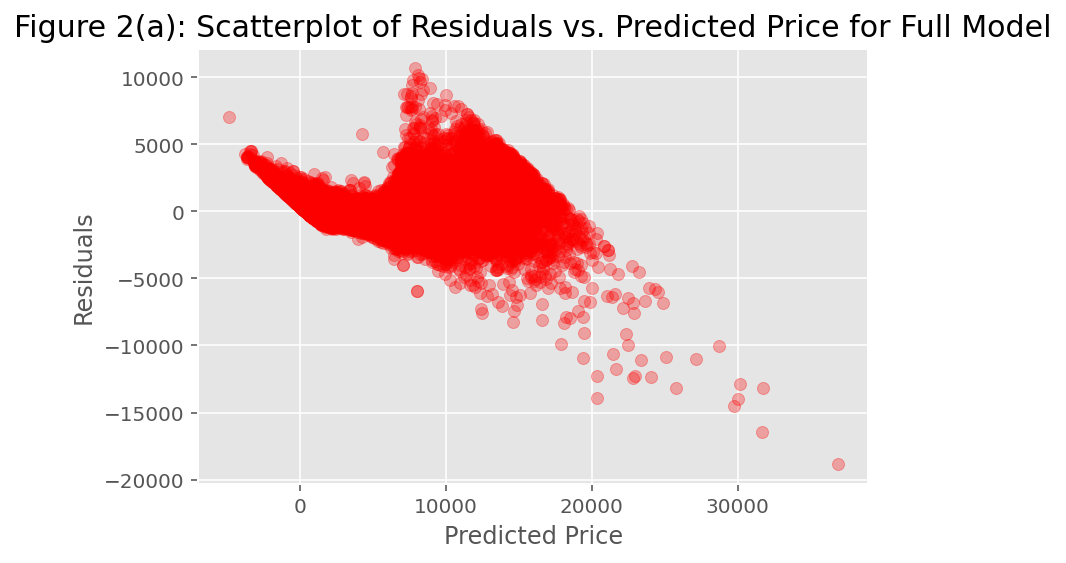

In [16]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3, color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of Residuals vs. Predicted Price for Full Model', fontsize=15)
plt.show()

From figure 2(a), we can see that it is not mostly random and centered around 0. The residuals show a banding area between 10000 and -5000. Therefore, this area illustrates that the constant variability assumption of linear regression is not quite satisfied in this case.

Secondly, let's plot actual price vs. residuals.

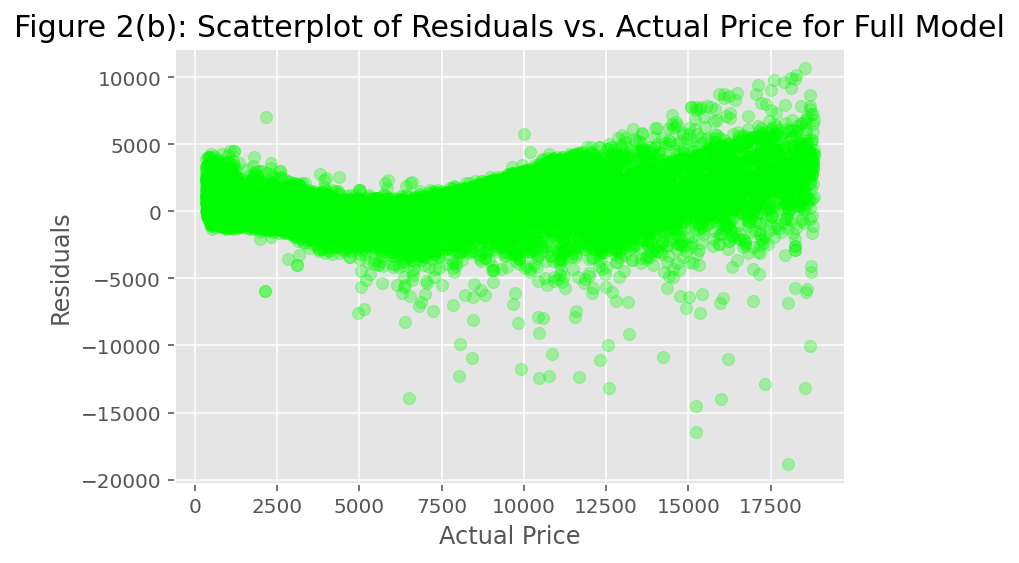

In [17]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3, color='lime')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of Residuals vs. Actual Price for Full Model', fontsize=15)
plt.show()

Figure 2(b) overestimates and underestimates some of the prices at all the time. Especially,the model mostly underestimates the prices over 15000.

Next, we overlay the histograms of actual vs. predicted price on the same plot.

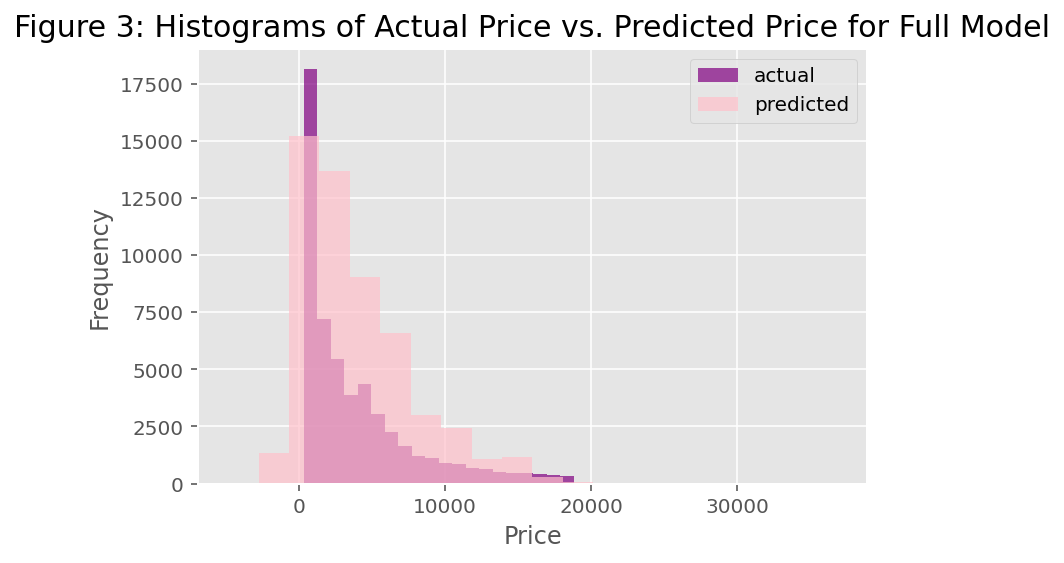

In [18]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7, color='purple')
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7, color='pink')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Figure 3: Histograms of Actual Price vs. Predicted Price for Full Model', fontsize=15)
plt.legend()
plt.show()

From the figure 3, we notice that the distribution is a skewed right histogram. The model's predictions are highly clustered between 2000 and 15000 approximately.

Then let's take a look at the histograms of the residuals.

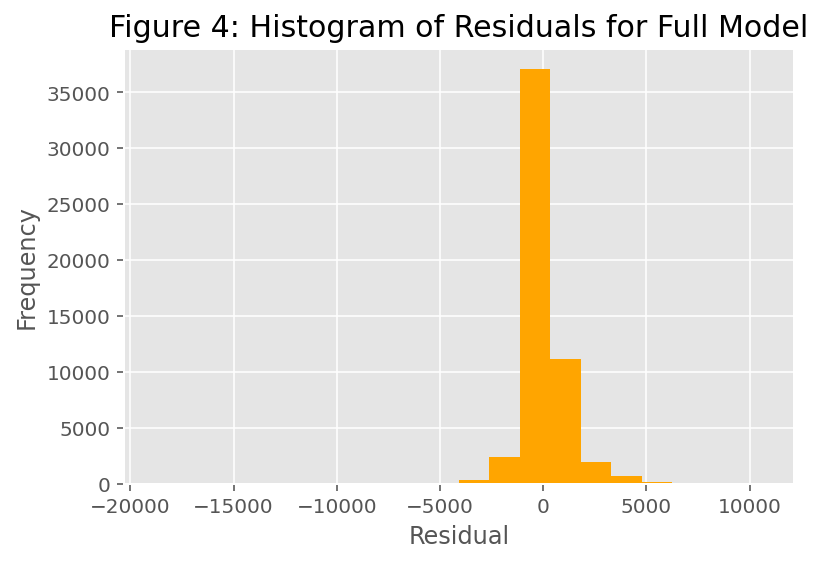

In [19]:
plt.hist(residuals_full['residual'], bins = 20, color = 'orange')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Figure 4: Histogram of Residuals for Full Model', fontsize=15)
plt.show()

From Figure 12, the histogram of the residuals seems somewhat right-skewed, though slightly symmetric.  
Nonetheless, it seems the normality assumption of linear regression is not significantly violated in this particular case.

### Feature Selection

We use the code below to perform backward feature selection using p-values ([credit](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb)).

In [20]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=csc_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = csc_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "y" with p-value 0.548

Removing term "z" with p-value 0.09065

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.641e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:53:09   Log-Likelihood:            -4.5511e+05
No. Observations:               53940   AIC:                         9.103e+05
Df Residuals:                   53915   BIC:                         9.105e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.

As we can see, this model returns an Adjusted R-squared of 0.9216, meaning the reduced model still explains about 92% of the variance, but with 2 less variables. Looking at the p-values, they are all significant at the 5% level, as expected.

### Reduced Model Overview

Next, we will define a new data frame for actual price vs. predicted price and the residuals for the reduced model.

In [21]:
residuals_reduced = pd.DataFrame({'actual': csc_encoded['price'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,326,-1363.609888,1689.609888
1,326,-932.475006,1258.475006
2,327,-236.866001,563.866001
3,334,-760.883388,1094.883388
4,335,-3047.192788,3382.192788
5,336,-1232.354699,1568.354699
6,336,-315.108938,651.108938
7,337,-1060.146405,1397.146405
8,337,-399.521329,736.521329
9,338,-739.519947,1077.519947


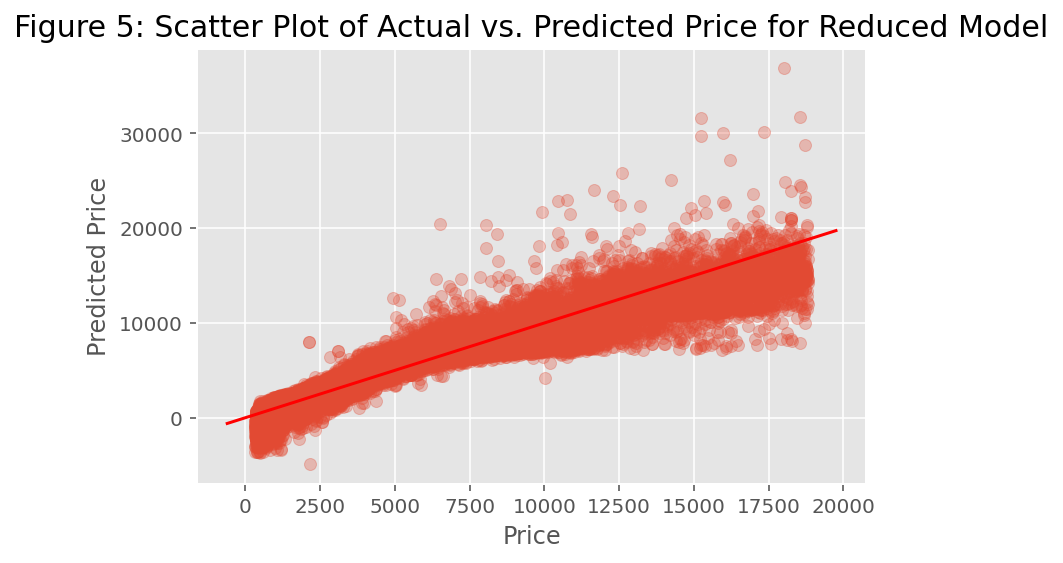

In [22]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 5: Scatter Plot of Actual vs. Predicted Price for Reduced Model', fontsize=15);
plt.show(); 

From Figure 5, we still can see the issues with our model. The model still somewhat underestimates the price. We will now perform the diagnostic checks on this reduced model.

### Reduced Model Diagnostic Checks

We first get a scatter plot of residuals (as a function of predicted price).

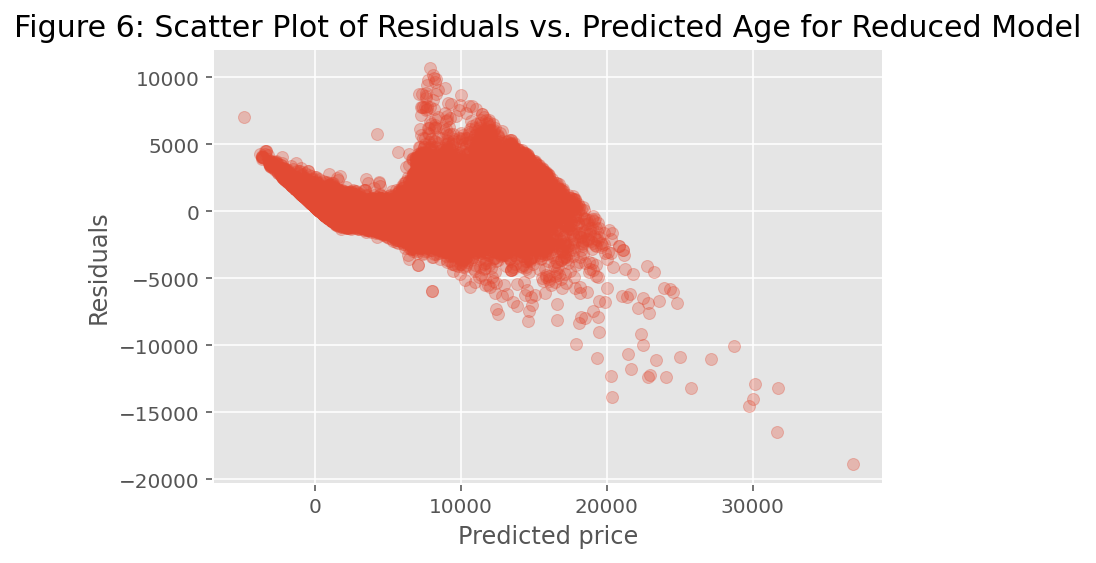

In [23]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted price');
plt.ylabel('Residuals')
plt.title('Figure 6: Scatter Plot of Residuals vs. Predicted Age for Reduced Model', fontsize=15)
plt.show();

As we can see that the Figure 6 is very similar to Figure 2(a).

Then we take a look at the histogram of the residuals for the reduced model.

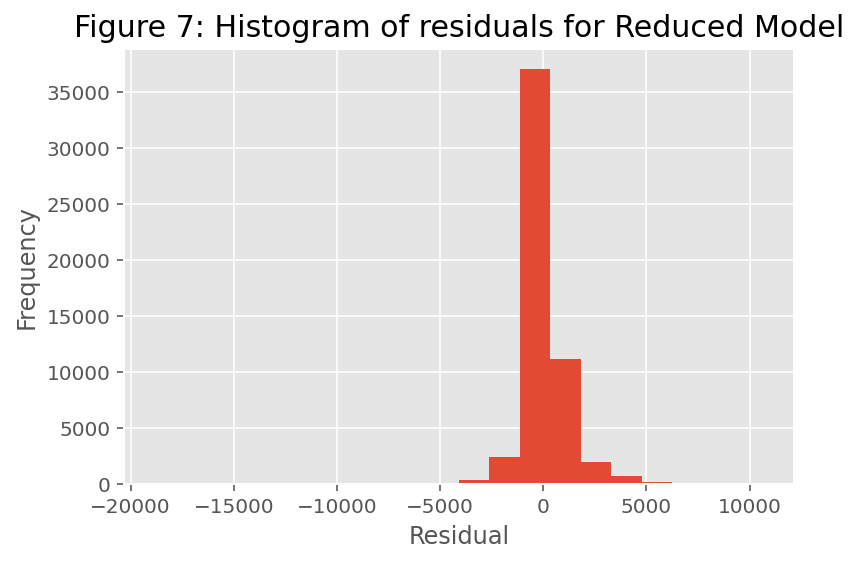

In [24]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 7, there is again a somewhat symmetric histogram around zero. That is, the residuals are somewhat normally distributed.

## Neural Network Model Fitting & Tuning <a id='Review'></a>

## Critique & Limitations <a id='cl'></a>

For the strength of Phase 2, we have a 92% Adjusted R-squared value, which proves that our report is credible. It shows that our variables are appropriate to fit in the multiple linear regression model for us to predict the price of diamond. For all graphs in Phase 2, we have a small explanation at the bottom to make it easy to understand. We also have a table of content to make readers know the content of our report before reading it.

However, there are still some limitation in our report. For the dataset in Phase 1, because the response value is a categorical feature and we want to avoid using logistic regression, we changed our dataset in Phase 2. Also, our model sometimes produce underestimate or overestimate predict values which makes the prediction not accurate.  

## Summary & Conclusions <a id='sc'></a>

### Project Summary <a id='sum'></a>

In Phase 1 of this project, we completed the data cleaning & preprocessing and data visualisation tasks. We have decided to drop the variables that contain similar information. For example, `inflight_wifi_service` and `inflight_entertainment` are dropped because they can be explained by using `inflight_service` variable. Likewise, `ease_of_online_booking` and `online_boarding` are also dropped because of the `onboard_service` variable. We also dropped the `arrival_delay_in_minutes` variable because it contains missing values which means there is no use for that variable. After that, we ensure all values in `gender` variable are marked as Male and Female and sampled random rows for our Phase 2 project. For data visualisation in Phase 1, we created some graph to explain variables in the dataset. With the graphs we created, we make assumption and explain our data by making comparison and concluding them.

In Phase 2 , because we want to select a numerical feature as our response variable, we have decided to change our dataset from `airline_passenger_satisfaction.csv` to `diamond.csv`. We start data cleaning by rename variables with whitespace and display  all unique categorical features. Then, we fit our data to an OLS (ordinary least squares) model to find out After that, we start model fitting by plotting a linear regression graph to observe the pattern between actual and predict price and perform a diagnostic checks to our model. 


### Summary of Findings <a id='find'></a>

By looking at the OLS (ordinary least squares) model, our full model have a 92% Adjusted R-squared value. After backwards variable selection with a 0.05 p-value cut off, we are able to keep the same Adjusted R-squared value with 2 less variables. For our final model, we have 24 variables with p-value of 0.

For the diagnostic checks of our model, the scatter plots show that residuals are not random and not centered around 0. Overestimates and underestimates always happen in the scatter plot especially when the price are over 15000. Also, There are a banding area between 10000 and -5000 which illustrates that the constant variability assumption of linear regression is not quite satisfied in this case. On the other hand, our residual histograms concluded that the model predictions are clustered between 2000 and 15000 and there is no significant violations of the normality assumption.

For the multiple linear regression model, we have a really high  Adjusted R-squared value with 92%. It shows that the variable in the dataset are a accurate to predict the price of diamond with the multiple linear regression framework. We can add more interaction variable to have a more in-depth analysis and even get a higher R-squared value. We can also fit it to a neural network to see if it is appropriate as well.


### Conclusions <a id='con'></a>

Because we have changed our csv file in Phase 2, our goal and objective also changed. Our goal for Phase 2 is to predict the price of diamond based on their carat, clarity, cut, and color. Our regression model predicts that 